# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Suvrangshu Ghosh
#----------------------
#Modification History:
#
#----------------------

# Dependencies and Setup
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

#filewrite = open(output_data_file,"w") 

#filewrite.write("Test write" + '\n') #write to txt file

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities)

626
['isangel', 'atuona', 'lebu', 'provideniya', 'punta arenas', 'natal', 'port alfred', 'ingham', 'rikitea', 'nanortalik', 'mahebourg', 'impfondo', 'tiarei', 'hilo', 'olafsvik', 'beringovskiy', 'westport', 'busselton', 'cherskiy', 'sokoto', 'saleaula', 'puerto ayora', 'la carolina', 'victoria', 'vaitupu', 'barrow', 'samarai', 'queenstown', 'barentsburg', 'taseyevo', 'butaritari', 'ushuaia', 'cape town', 'carnarvon', 'maragogi', 'kaitangata', 'nuuk', 'huanren', 'lichinga', 'poum', 'kuching', 'saskylakh', 'esperance', 'ornskoldsvik', 'grindavik', 'grand river south east', 'cidreira', 'karratha', 'luderitz', 'avarua', 'palabuhanratu', 'illoqqortoormiut', 'aflu', 'port hardy', 'labuhan', 'tiksi', 'hobart', 'bredasdorp', 'mataura', 'castro', 'albany', 'east london', 'naze', 'veraval', 'ulaangom', 'saint george', 'belushya guba', 'hamilton', 'kapaa', 'bluff', 'lorengau', 'rutland', 'vaini', 'umzimvubu', 'oda', 'cabo san lucas', 'tasiilaq', 'xocali', 'shenzhen', 'sao gotardo', 'thompson', 'b

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:

#create data frame for weather
weather_df = pd.DataFrame(columns=
                          ['City',
                           'Cloudiness',
                           'Country',
                           'Date',
                           'Humidity',
                           'Lat',
                           'Lng',
                           'Max Temp',
                           'Wind Speed']
                           )
#declare counter to count records and sets (50 record = 1 set)

count = 0
xset = 1
for xcity in cities:
    try:
        if count == 0:
            print("*** Begin of data retrival for set # ", xset, " ***") #print- begin statement at first
            print("_"  * 31,'\n')
            
        count+=1
        api = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={api_keys.api_key}&q={xcity}"
        
        print(f"Processing Record {count} of Set {xset} | {xcity}")
        print(api)
        if count == 50:
            count = 0
            xset+=1
        response = requests.get(api).json()
        
        cloudiness = response["clouds"]["all"]
        country = response["sys"]["country"]
        date = response["dt"]
        humidity = response["main"]["humidity"]
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]
        max_temp = response["main"]["temp_max"]
        wind_speed = response["wind"]["speed"]
        
        weather = {
            "City":xcity,
            "Cloudiness":cloudiness,
            "Country":country,
            "Date":date,
            "Humidity":humidity,
            "Lat":lat,
            "Lng":lng,
            "Max Temp":max_temp,
            "Wind Speed":wind_speed}
        
        weather_df = weather_df.append(weather, ignore_index=True)
        
    except:
        print("City not found. Skipping...")
        
print("_"  * 31,'\n')
        
print("*** Data Retrieval Complete ***")

print("_"  * 31,'\n')

    

*** Begin of data retrival for set #  1  ***
_______________________________ 

Processing Record 1 of Set 1 | isangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=isangel
Processing Record 2 of Set 1 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=atuona
Processing Record 3 of Set 1 | lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=lebu
Processing Record 4 of Set 1 | provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=provideniya
Processing Record 5 of Set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=punta arenas
Processing Record 6 of Set 1 | natal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=natal
Processing Reco

City not found. Skipping...
Processing Record 3 of Set 2 | aflu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=aflu
City not found. Skipping...
Processing Record 4 of Set 2 | port hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=port hardy
Processing Record 5 of Set 2 | labuhan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=labuhan
Processing Record 6 of Set 2 | tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=tiksi
Processing Record 7 of Set 2 | hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=hobart
Processing Record 8 of Set 2 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=bredasdorp
Processing Record 9 of Set 2 | mataura
http:

Processing Record 6 of Set 3 | flinders
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=flinders
Processing Record 7 of Set 3 | mtsamboro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=mtsamboro
Processing Record 8 of Set 3 | upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=upernavik
Processing Record 9 of Set 3 | vagur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=vagur
Processing Record 10 of Set 3 | manggar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=manggar
Processing Record 11 of Set 3 | bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=bethel
Processing Record 12 of Set 3 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units

Processing Record 7 of Set 4 | filadelfia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=filadelfia
Processing Record 8 of Set 4 | san cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=san cristobal
Processing Record 9 of Set 4 | wawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=wawa
Processing Record 10 of Set 4 | camacha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=camacha
Processing Record 11 of Set 4 | codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=codrington
Processing Record 12 of Set 4 | safwah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=safwah
City not found. Skipping...
Processing Record 13 of Set 4 | praya
http://api.open

City not found. Skipping...
Processing Record 9 of Set 5 | port lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=port lincoln
Processing Record 10 of Set 5 | sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=sitka
Processing Record 11 of Set 5 | brownsville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=brownsville
Processing Record 12 of Set 5 | adelaide
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=adelaide
Processing Record 13 of Set 5 | wilmington island
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=wilmington island
Processing Record 14 of Set 5 | mar del plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=mar del plata
Processing Record 1

Processing Record 11 of Set 6 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=georgetown
Processing Record 12 of Set 6 | san pedro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=san pedro
Processing Record 13 of Set 6 | alekseyevsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=alekseyevsk
Processing Record 14 of Set 6 | villamontes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=villamontes
Processing Record 15 of Set 6 | kangaatsiaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=kangaatsiaq
Processing Record 16 of Set 6 | najran
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=najran
Processing Record 17 of Set 6 | emerald
http://api.openweather

Processing Record 14 of Set 7 | hobyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=hobyo
Processing Record 15 of Set 7 | culebra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=culebra
Processing Record 16 of Set 7 | victor harbor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=victor harbor
Processing Record 17 of Set 7 | kargil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=kargil
Processing Record 18 of Set 7 | nkhotakota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=nkhotakota
Processing Record 19 of Set 7 | sao filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=sao filipe
Processing Record 20 of Set 7 | inuvik
http://api.openweathermap.org/data/2.

Processing Record 17 of Set 8 | la rioja
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=la rioja
Processing Record 18 of Set 8 | santiago de cao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=santiago de cao
Processing Record 19 of Set 8 | saint-augustin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=saint-augustin
Processing Record 20 of Set 8 | iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=iqaluit
Processing Record 21 of Set 8 | minden
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=minden
Processing Record 22 of Set 8 | ponta delgada
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=ponta delgada
Processing Record 23 of Set 8 | sassandra
http://api

Processing Record 20 of Set 9 | deputatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=deputatskiy
Processing Record 21 of Set 9 | norman wells
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=norman wells
Processing Record 22 of Set 9 | umm kaddadah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=umm kaddadah
Processing Record 23 of Set 9 | shenjiamen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=shenjiamen
Processing Record 24 of Set 9 | bac lieu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=bac lieu
City not found. Skipping...
Processing Record 25 of Set 9 | healdsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=healdsburg
Processing Record 26 of 

Processing Record 22 of Set 10 | mopipi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=mopipi
Processing Record 23 of Set 10 | turbat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=turbat
Processing Record 24 of Set 10 | nhulunbuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=nhulunbuy
Processing Record 25 of Set 10 | portland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=portland
Processing Record 26 of Set 10 | zhezkazgan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=zhezkazgan
Processing Record 27 of Set 10 | ronne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=ronne
Processing Record 28 of Set 10 | te anau
http://api.openweathermap.org/data/2.5/weat

Processing Record 25 of Set 11 | tungkang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=tungkang
City not found. Skipping...
Processing Record 26 of Set 11 | helong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=helong
Processing Record 27 of Set 11 | dingle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=dingle
Processing Record 28 of Set 11 | pachino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=pachino
Processing Record 29 of Set 11 | sinnamary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=sinnamary
Processing Record 30 of Set 11 | nabire
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=nabire
Processing Record 31 of Set 11 | lucea
http://api.openweathe

Processing Record 28 of Set 12 | yenagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=yenagoa
Processing Record 29 of Set 12 | kozhevnikovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=kozhevnikovo
Processing Record 30 of Set 12 | acarau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=acarau
City not found. Skipping...
Processing Record 31 of Set 12 | halifax
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=halifax
Processing Record 32 of Set 12 | shubarshi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=shubarshi
Processing Record 33 of Set 12 | hlotse
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb642addd93c8a13e1cbedb978f6c268&q=hlotse
City not found. Skipping...
Processing Record 34 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#check dataframe 
weather_df.count()

City          542
Cloudiness    542
Country       542
Date          542
Humidity      542
Lat           542
Lng           542
Max Temp      542
Wind Speed    542
dtype: int64

In [5]:
#Export the city data into a .csv.
weather_df.to_csv(output_data_file)
#Display the DataFrame
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,bredasdorp,0,ZA,1546588800,57,-34.53,20.04,78.80,6.93
1,atuona,88,PF,1546589616,100,-9.80,-139.03,77.58,14.70
2,lazo,48,MD,1546589981,94,47.89,27.93,20.57,7.76
3,cidreira,92,BR,1546589732,100,-30.17,-50.22,68.36,5.75
4,kalabo,92,ZM,1546589981,100,-15.00,22.67,71.51,4.97


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

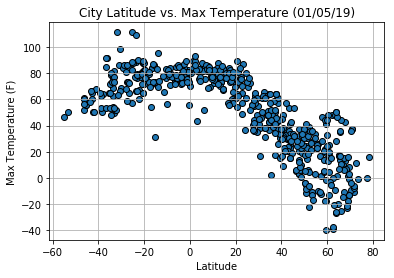

In [10]:
#scatter plot
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors = 'black')

plt.grid()
plt.title("City Latitude vs. Max Temperature (01/05/19)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.savefig('output_data/Latitude_MaxTemp.png')
plt.show()

#### Latitude vs. Humidity Plot

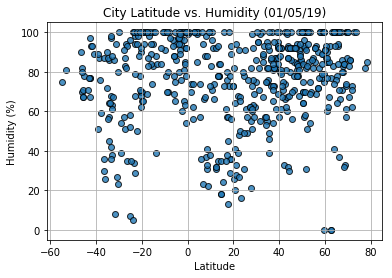

In [11]:
#scatter plot latitude Vs Humidity

plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors = 'black', alpha=0.8)


plt.grid()
plt.title("City Latitude vs. Humidity (01/05/19)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.savefig('output_data/Latitude_Humidity.png')
plt.show()


#### Latitude vs. Cloudiness Plot

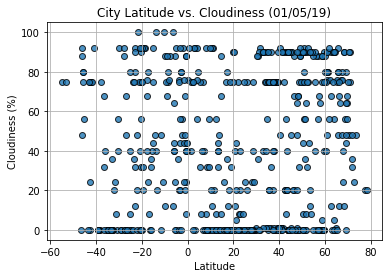

In [12]:
#scatter plot latitude Vs Cloudniess
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors = 'black', alpha=0.8)


plt.grid()
plt.title("City Latitude vs. Cloudiness (01/05/19)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig('output_data/Latitude_Cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

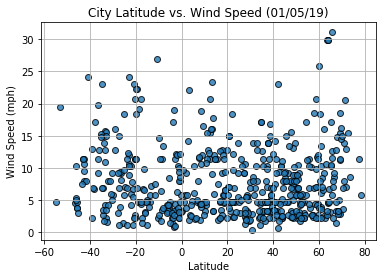

In [13]:
#scatter plot latitude Vs Wind Speed 
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors = 'black', alpha=0.8)


plt.grid()
plt.title("City Latitude vs. Wind Speed (01/05/19)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.savefig('output_data/Latitude_Wind_Speed.png')
plt.show()